## Libs used

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Scikit learn is below

## Our dataframe

In [2]:
df = pd.read_csv('Mobile phone price.csv')
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [3]:
df.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

In [4]:
print(df.isnull().sum())
print(f'\nDuplicated count: {df.duplicated().sum()}')

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

Duplicated count: 26


No null values this time, but still there is duplicates..

In [5]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True) # so it doesn't screw up our later operations

In [6]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [7]:
df.rename(columns= {'Storage ':'Storage', 'RAM ':'RAM'}, inplace=True) # trust me it is important for my mental health

C:\Users\Moham\AppData\Local\Temp\ipykernel_11640\2445332245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {'Storage ':'Storage', 'RAM ':'RAM'}, inplace=True) # trust me it is important for my mental health


Now we are going to de-string the object columns

In [8]:
# 1
rows = len(df)

In [9]:
for i in range(rows):   # remove non-numeric values in rows
    if 'MP' in df.loc[i, 'Camera (MP)']: 
        df.loc[i, 'Camera (MP)'] = df.loc[i, 'Camera (MP)'].replace('MP', '')
    if 'GB' in df.loc[i, 'Storage']: 
        df.loc[i, 'Storage'] = df.loc[i, 'Storage'].replace('GB', '')
    if 'GB' in df.loc[i, 'RAM']:  
        df.loc[i, 'RAM'] = df.loc[i, 'RAM'].replace('GB', '')
    if '$' in df.loc[i, 'Price ($)']:
        df.loc[i, 'Price ($)'] = df.loc[i, 'Price ($)'].replace('$', '')
    if ',' in df.loc[i, 'Price ($)']:
        df.loc[i, 'Price ($)'] = df.loc[i, 'Price ($)'].replace(',', '')
    if '(unfolded)' in df.loc[i, 'Screen Size (inches)']:
        df.loc[i, 'Screen Size (inches)'] = df.loc[i, 'Screen Size (inches)'].replace('(unfolded)', '')

### Solving 'Camera' Problem

1. we convert camera column to a list
2. we split the values and remove the delimiter, ex: '105 + 23 + 40 + 4' --> ['105', '23', '40', '4']
3. we append the items into a bigger list 
    3b. we notice there is appended feature to the camera resolutions (3D, ToF), so we will seperate those two values from the list and place them as column later in the dataframe
    -- adding features to the dataset and testing its corr later --

4. we are making a big temporary column outside of the dataframe to distribute its features as columns in the dataframe later
   
    ex: [['105', '23', '40', '4']] --> (Camera_Num)[4], (Max_res)[105], (Min_res)[4]
    --this operation is applied to every row--
5. converting following lists: Camera_Num, Max_res, Min_res into pandas.series and appending them into the dataframe

In [10]:
camera_specs = df['Camera (MP)'].to_list() # 1

In [11]:
camera_specs_m = []
camera_features = []
for i in camera_specs:
    sub = i.split('+') # 2
    camera_specs_m.append(sub) # 3
    for i in sub: # 3b
        '''
        we are making a manual one hot encoding algorithm for this one
        '''
        if (i == '3D') or (i == 'ToF'):
            temp = [0, 0]
            temp[0] = camera_specs_m.index(sub) # get the index of the row with 3D or ToF feature
            temp[1] = i # the name of the feature itself
            sub.remove(i) # removing the value from the list items 
            camera_features.append(temp) # appending (index, f) in another external list -- will be used as input to change df.loc values later --

In [12]:
camera_specs_m

[['12 ', ' 12 ', ' 12'],
 ['108 ', ' 10 ', ' 10 ', ' 12'],
 ['48 ', ' 50 ', ' 8 ', ' 2'],
 ['64 ', ' 8 ', ' 5 ', ' 2'],
 ['50 ', ' 12.2'],
 ['12 ', ' 12'],
 ['12 ', ' 12'],
 ['48 ', ' 8 ', ' 2 ', ' 2'],
 ['50 ', ' 13 ', ' 16 ', ' 2'],
 ['50 ', ' 48 ', ' 12 ', ' 8'],
 ['64 ', ' 8 ', ' 2'],
 ['64 ', ' 12 ', ' 5 ', ' 5'],
 ['64 ', ' 8 ', ' 2'],
 ['12 ', ' 12'],
 ['50 ', ' 50 ', ' 13 ', ' 3'],
 ['64 ', ' 8 ', ' 5'],
 ['64 ', ' 12 ', ' 12'],
 ['50 ', ' 2 ', ' 2'],
 ['48 ', ' 2 ', ' 2'],
 ['48 ', ' 8 ', ' 2 ', ' 2'],
 ['50 ', ' 8 ', ' 2 ', ' 2'],
 ['48 ', ' 5'],
 ['48 ', ' 50 ', ' 2'],
 ['48 ', ' 50 ', ' 2'],
 ['108 ', ' 8 ', ' 5 ', ' 2'],
 ['12 ', ' 12'],
 ['13 ', ' 2 ', ' 2'],
 ['48 ', ' 2 ', ' 2'],
 ['13 ', ' 2'],
 ['50 ', ' 2 ', ' 2'],
 ['64 ', ' 12 ', ' 5 ', ' 5'],
 ['50 ', ' 8 ', ' 2 ', ' 2'],
 ['12'],
 ['13 ', ' 2 ', ' 2'],
 ['50 ', ' 2 ', ' 2'],
 ['13 ', ' 2 ', ' 2'],
 ['48 ', ' 5 ', ' 2'],
 ['50 ', ' 8 ', ' 2'],
 ['48 ', ' 2 ', ' 2'],
 ['12'],
 ['13 ', ' 2 ', ' 2'],
 ['13 ', ' 2 ', 

In [13]:
camera_num = []
camera_max_res = []
camera_min_res = []
for i in camera_specs_m:
    camera_num.append(len(i)) # making camera_num list (contains number of cameras)
    camera_max_res.append(max(i)) # making camera_max_res list (contains the highest camera resolution)
    camera_min_res.append(min(i)) # making camera_min_res list (contains the lowest camera resolution)


In [14]:
camera_max_res

['12 ',
 '108 ',
 '48 ',
 '64 ',
 '50 ',
 '12 ',
 '12 ',
 '48 ',
 '50 ',
 '50 ',
 '64 ',
 '64 ',
 '64 ',
 '12 ',
 '50 ',
 '64 ',
 '64 ',
 '50 ',
 '48 ',
 '48 ',
 '50 ',
 '48 ',
 '48 ',
 '48 ',
 '108 ',
 '12 ',
 '13 ',
 '48 ',
 '13 ',
 '50 ',
 '64 ',
 '50 ',
 '12',
 '13 ',
 '50 ',
 '13 ',
 '48 ',
 '50 ',
 '48 ',
 '12',
 '13 ',
 '13 ',
 '48 ',
 '64 ',
 '48 ',
 '64 ',
 '48 ',
 '48 ',
 '13 ',
 '48 ',
 '12 ',
 '13 ',
 '50 ',
 '64 ',
 '13 ',
 '48 ',
 '12 ',
 '50 ',
 '64 ',
 '64 ',
 '12',
 '64 ',
 '64 ',
 '64 ',
 '48 ',
 '64 ',
 '12 ',
 '50 ',
 '13 ',
 '48 ',
 '48 ',
 '64 ',
 '12 ',
 '48 ',
 '50 ',
 '12 ',
 '64 ',
 '50 ',
 '50 ',
 '48 ',
 '64 ',
 '50 ',
 '50 ',
 '108 ',
 '48 ',
 '12 ',
 '64 ',
 '64 ',
 '13 ',
 '64 ',
 '108 ',
 '48 ',
 '48 ',
 '50 ',
 '108 ',
 '48 ',
 '64 ',
 '64 ',
 '12 ',
 '13 ',
 '12 ',
 '48 ',
 '50 ',
 '13 ',
 '13 ',
 '8 ',
 '12 ',
 '13 ',
 '48 ',
 '13 ',
 '64 ',
 '48 ',
 '12 ',
 '50 ',
 '13 ',
 '50 ',
 '48 ',
 '50 ',
 '48 ',
 '64 ',
 '13 ',
 '64 ',
 '50 ',
 '48 ',
 '64 ',

In [15]:
df['Camera Num'] = camera_num
df['Camera Max_Res(MP)'] = camera_max_res
df['Camera Min_Res(MP)'] = camera_min_res

C:\Users\Moham\AppData\Local\Temp\ipykernel_11640\3037530757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Camera Num'] = camera_num
C:\Users\Moham\AppData\Local\Temp\ipykernel_11640\3037530757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Camera Max_Res(MP)'] = camera_max_res
C:\Users\Moham\AppData\Local\Temp\ipykernel_11640\3037530757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Camera Num,Camera Max_Res(MP),Camera Min_Res(MP)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999,3,12,12
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199,4,108,10
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899,4,48,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,4,64,2
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799,2,50,12.2
...,...,...,...,...,...,...,...,...,...,...,...
376,Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329,3,8,2
377,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,3,64,12
378,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,4,8,2
379,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3,12,12


In [17]:
df = df.drop(['Camera (MP)'], axis=1)

In [18]:
f1 = [] # 3D feature
f2 = [] # ToF feature
for i in range(rows):
    f1.append('0')
    f2.append('0')


In [19]:
df['3D'] = f1
df['ToF'] = f2

In [20]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Num,Camera Max_Res(MP),Camera Min_Res(MP),3D,ToF
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,0,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,0,0
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,2,0,0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,2,0,0
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Huawei,P30 Lite,128,4,6.15,3340,329,3,8,2,0,0
377,Samsung,Galaxy Note20 5G,128,8,6.7,4300,1049,3,64,12,0,0
378,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,4,8,2,0,0
379,Apple,iPhone 12 Pro Max,128,6,6.7,3687,1099,3,12,12,0,0


In [21]:
for i in camera_features:
    df.loc[i[0], i[1]] = 1
# ex: df.loc[345, '3D'] = 1

In [22]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Num,Camera Max_Res(MP),Camera Min_Res(MP),3D,ToF
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,0,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,0,0
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,2,0,0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,2,0,0
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Huawei,P30 Lite,128,4,6.15,3340,329,3,8,2,0,0
377,Samsung,Galaxy Note20 5G,128,8,6.7,4300,1049,3,64,12,0,0
378,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,4,8,2,0,0
379,Apple,iPhone 12 Pro Max,128,6,6.7,3687,1099,3,12,12,0,0


In [23]:
df['3D'].unique()

array(['0', 1], dtype=object)

In [24]:
df['ToF'].unique()

array(['0', 1], dtype=object)

## Transforming Numerical features from __Object__ to __Numeric__ data types(Int64, Float64)

In [25]:
df.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Battery Capacity (mAh)     int64
Price ($)                 object
Camera Num                 int64
Camera Max_Res(MP)        object
Camera Min_Res(MP)        object
3D                        object
ToF                       object
dtype: object

In [26]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'Camera Num',
       'Camera Max_Res(MP)', 'Camera Min_Res(MP)', '3D', 'ToF'],
      dtype='object')

In [27]:
to_numeric = ['Price ($)', 'Camera Max_Res(MP)', 'Camera Min_Res(MP)', '3D', 'ToF', 'Storage', 'RAM', 'Screen Size (inches)']

In [28]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Num,Camera Max_Res(MP),Camera Min_Res(MP),3D,ToF
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,0,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,0,0
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,2,0,0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,2,0,0
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Huawei,P30 Lite,128,4,6.15,3340,329,3,8,2,0,0
377,Samsung,Galaxy Note20 5G,128,8,6.7,4300,1049,3,64,12,0,0
378,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,4,8,2,0,0
379,Apple,iPhone 12 Pro Max,128,6,6.7,3687,1099,3,12,12,0,0


In [29]:
df.index[df['Screen Size (inches)']=='6.8 + 3.9'].tolist()
df.loc[86, 'Screen Size (inches)'] = '6.8'

In [30]:
for i in to_numeric:
  df[i] = pd.to_numeric(df[i], errors='coerce')

In [31]:
print(df.dtypes)
print(df.columns)

Brand                      object
Model                      object
Storage                     int64
RAM                         int64
Screen Size (inches)      float64
Battery Capacity (mAh)      int64
Price ($)                   int64
Camera Num                  int64
Camera Max_Res(MP)          int64
Camera Min_Res(MP)        float64
3D                          int64
ToF                         int64
dtype: object
Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'Camera Num',
       'Camera Max_Res(MP)', 'Camera Min_Res(MP)', '3D', 'ToF'],
      dtype='object')


### ___Encoding___

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
features = ['Brand', 'Model']
le = LabelEncoder()

In [34]:
for i in features:
    df[i] = le.fit_transform(df[i])

In [35]:
df['Brand'].unique()

array([ 0, 12,  9, 15,  4, 10, 14, 11,  7,  8, 13,  6,  1,  2,  3,  5])

In [36]:
df['Model'].unique()

array([232, 100,  19, 178, 162, 231, 104, 166, 192, 203, 150,  79,  63,
       227,  57, 119,  99, 212,  17,  37, 170,  72, 144,  18, 179, 224,
        65,  34, 208,  20,  92, 169, 236,  28, 217,  47,  71, 149, 164,
       237,  24,  45,  82,  54, 122, 197,  12,  86,  25, 173, 225, 210,
       146,  30, 175, 233, 216,  81, 190, 235, 219,  11,  78,  52, 180,
       214, 118, 202, 145, 148, 167,  62, 191,  50, 204, 205, 200, 223,
       108,  53, 135,   5, 106, 222, 107, 194, 103, 121, 206,  43,  97,
       123, 168, 199,  51, 187, 133,  59,  89,  16,  48,  74, 131,  69,
       207,  55, 143, 128, 193, 101,  60, 172,  31,  87, 126, 165,  84,
        49,  44, 196, 183, 125, 198,  29, 120, 130,  32,  83,  91, 134,
        68,  76, 139,  70,  33, 220, 115, 142,  93,  67,  23,  40, 176,
        27,   8,  88,  22,  58,  46, 201, 213, 186, 215,  75, 177, 195,
         3,  42,   0,  64, 218, 141,   4, 182,  85, 211,  39,   1, 171,
        66,  21,  41,   2, 181,  26, 209, 140,  73,  94, 161, 11

In [37]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Num,Camera Max_Res(MP),Camera Min_Res(MP),3D,ToF
0,0,232,128,6,6.10,3095,999,3,12,12.0,0,0
1,12,100,256,12,6.80,5000,1199,4,108,10.0,0,0
2,9,19,128,8,6.70,4500,899,4,48,2.0,0,0
3,15,178,128,6,6.67,5020,279,4,64,2.0,0,0
4,4,162,128,8,6.40,4614,799,2,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,5,155,128,4,6.15,3340,329,3,8,2.0,0,0
377,12,95,128,8,6.70,4300,1049,3,64,12.0,0,0
378,15,111,128,6,6.57,4160,349,4,8,2.0,0,0
379,0,229,128,6,6.70,3687,1099,3,12,12.0,0,0


<Axes: >

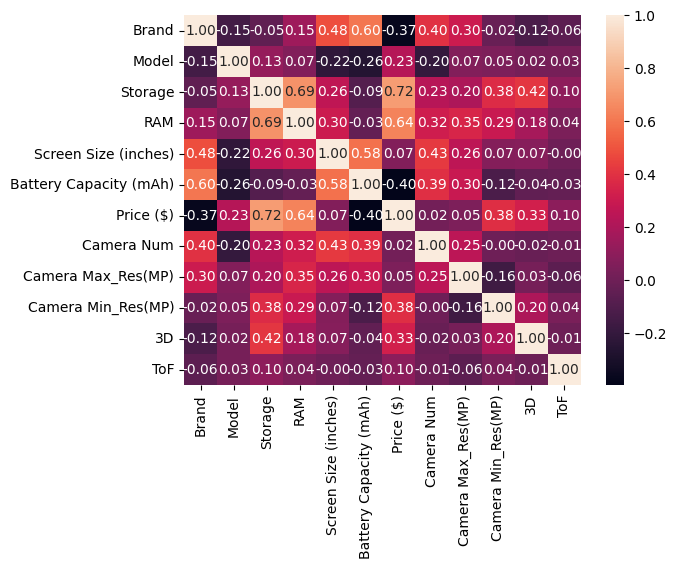

In [38]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

## ___Outliers time!___

Brand                        Axes(0.125,0.747241;0.133621x0.132759)
Model                     Axes(0.285345,0.747241;0.133621x0.132759)
Storage                    Axes(0.44569,0.747241;0.133621x0.132759)
RAM                       Axes(0.606034,0.747241;0.133621x0.132759)
Screen Size (inches)      Axes(0.766379,0.747241;0.133621x0.132759)
Battery Capacity (mAh)       Axes(0.125,0.587931;0.133621x0.132759)
Price ($)                 Axes(0.285345,0.587931;0.133621x0.132759)
Camera Num                 Axes(0.44569,0.587931;0.133621x0.132759)
Camera Max_Res(MP)        Axes(0.606034,0.587931;0.133621x0.132759)
Camera Min_Res(MP)        Axes(0.766379,0.587931;0.133621x0.132759)
3D                           Axes(0.125,0.428621;0.133621x0.132759)
ToF                       Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

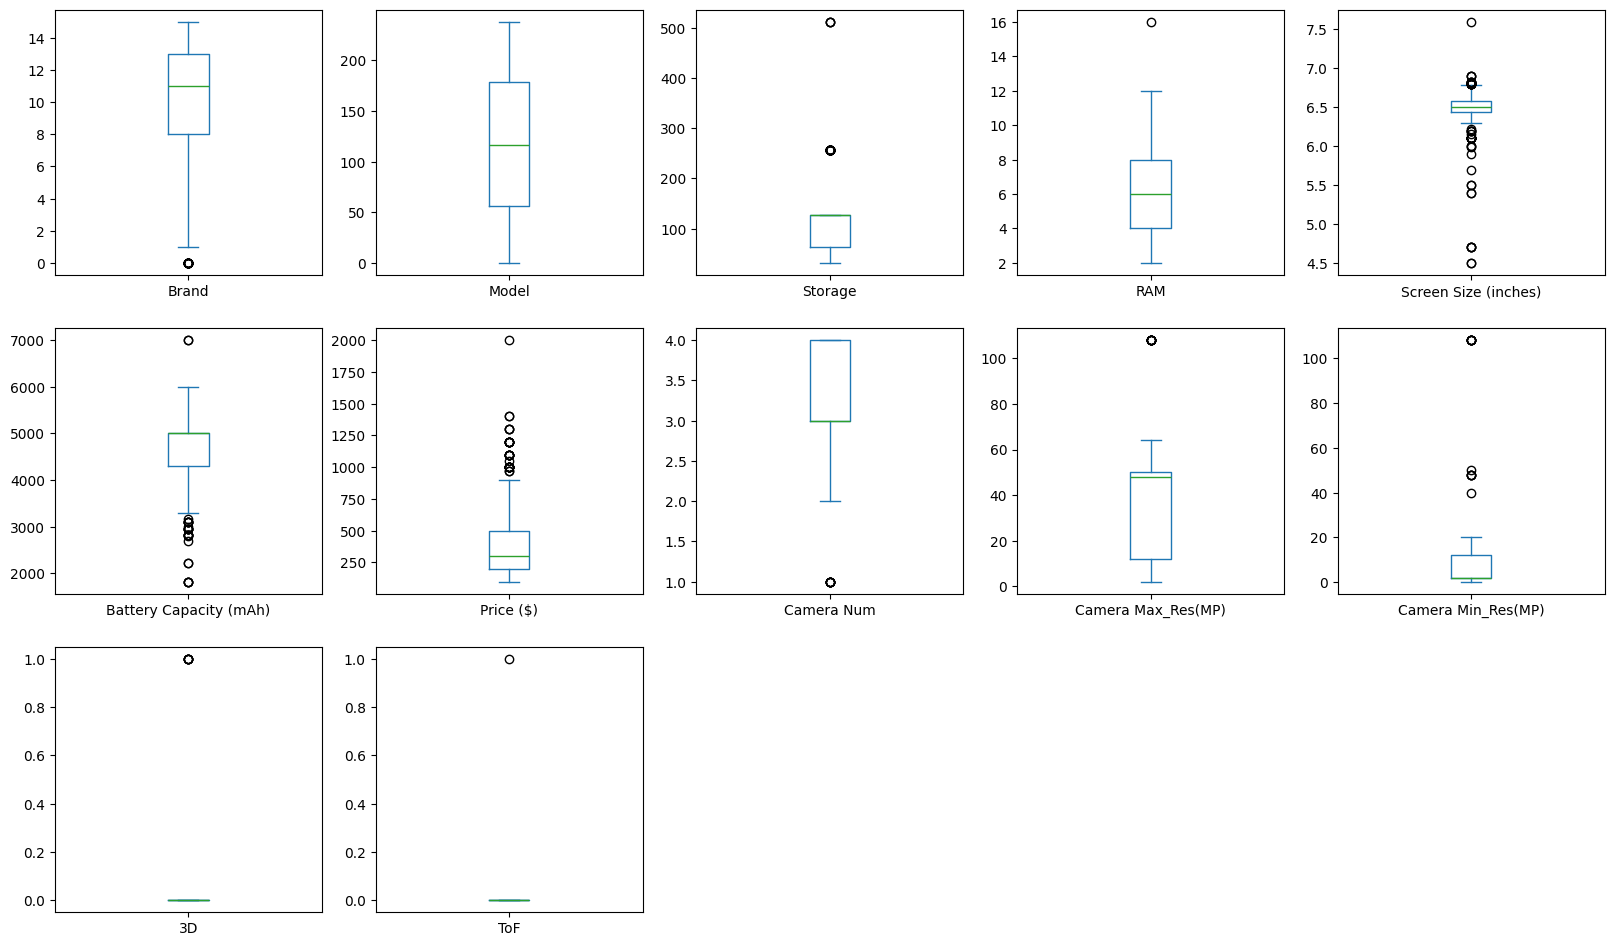

In [39]:
df.plot(kind = 'box', subplots = True, figsize = (20, 20), layout = (5, 5))

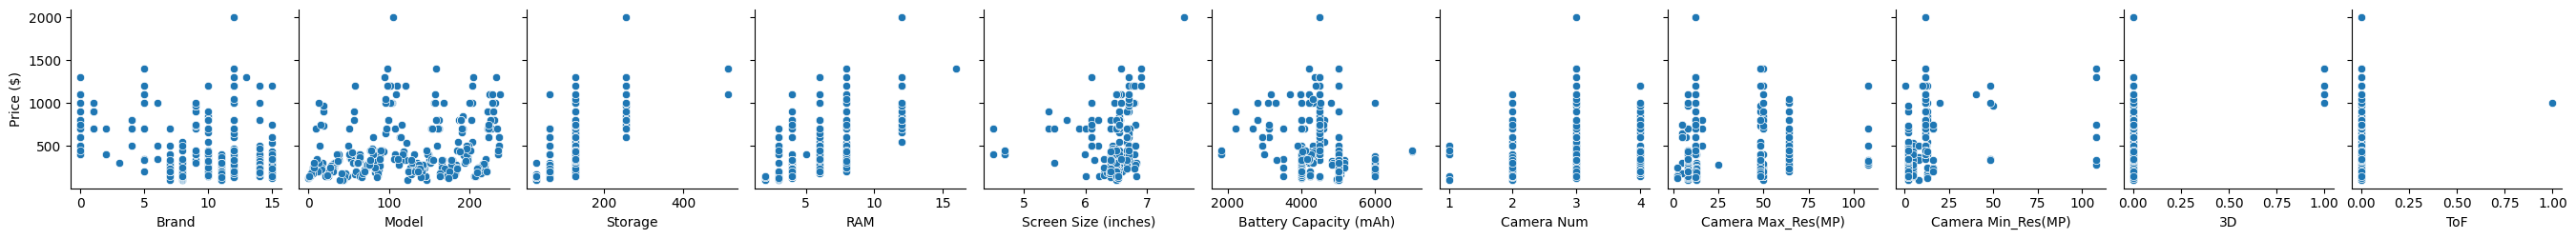

In [40]:
sns.pairplot(df, x_vars=df.drop(columns='Price ($)'), y_vars=['Price ($)'])

In [41]:
def remove_outliers(series, k = 1.5): # series are pandas columns
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    
    series_cleaned = series.mask((series < lower_bound) | (series > upper_bound), np.nan) # replaces outlier values in each column with null values
    
    return series_cleaned


In [42]:
cat = ['Brand', 'Model', '3D', 'ToF']
columns = df.columns.to_list()
for i in cat:
    columns.remove(i)

In [43]:
df_filtered = df.copy()

In [44]:
for col in columns:
    df_filtered[col] = remove_outliers(df[col])

In [45]:
df_filtered = df_filtered.dropna()


In [46]:
df_filtered.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Battery Capacity (mAh)    0
Price ($)                 0
Camera Num                0
Camera Max_Res(MP)        0
Camera Min_Res(MP)        0
3D                        0
ToF                       0
dtype: int64

Brand                        Axes(0.125,0.747241;0.133621x0.132759)
Model                     Axes(0.285345,0.747241;0.133621x0.132759)
Storage                    Axes(0.44569,0.747241;0.133621x0.132759)
RAM                       Axes(0.606034,0.747241;0.133621x0.132759)
Screen Size (inches)      Axes(0.766379,0.747241;0.133621x0.132759)
Battery Capacity (mAh)       Axes(0.125,0.587931;0.133621x0.132759)
Price ($)                 Axes(0.285345,0.587931;0.133621x0.132759)
Camera Num                 Axes(0.44569,0.587931;0.133621x0.132759)
Camera Max_Res(MP)        Axes(0.606034,0.587931;0.133621x0.132759)
Camera Min_Res(MP)        Axes(0.766379,0.587931;0.133621x0.132759)
3D                           Axes(0.125,0.428621;0.133621x0.132759)
ToF                       Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

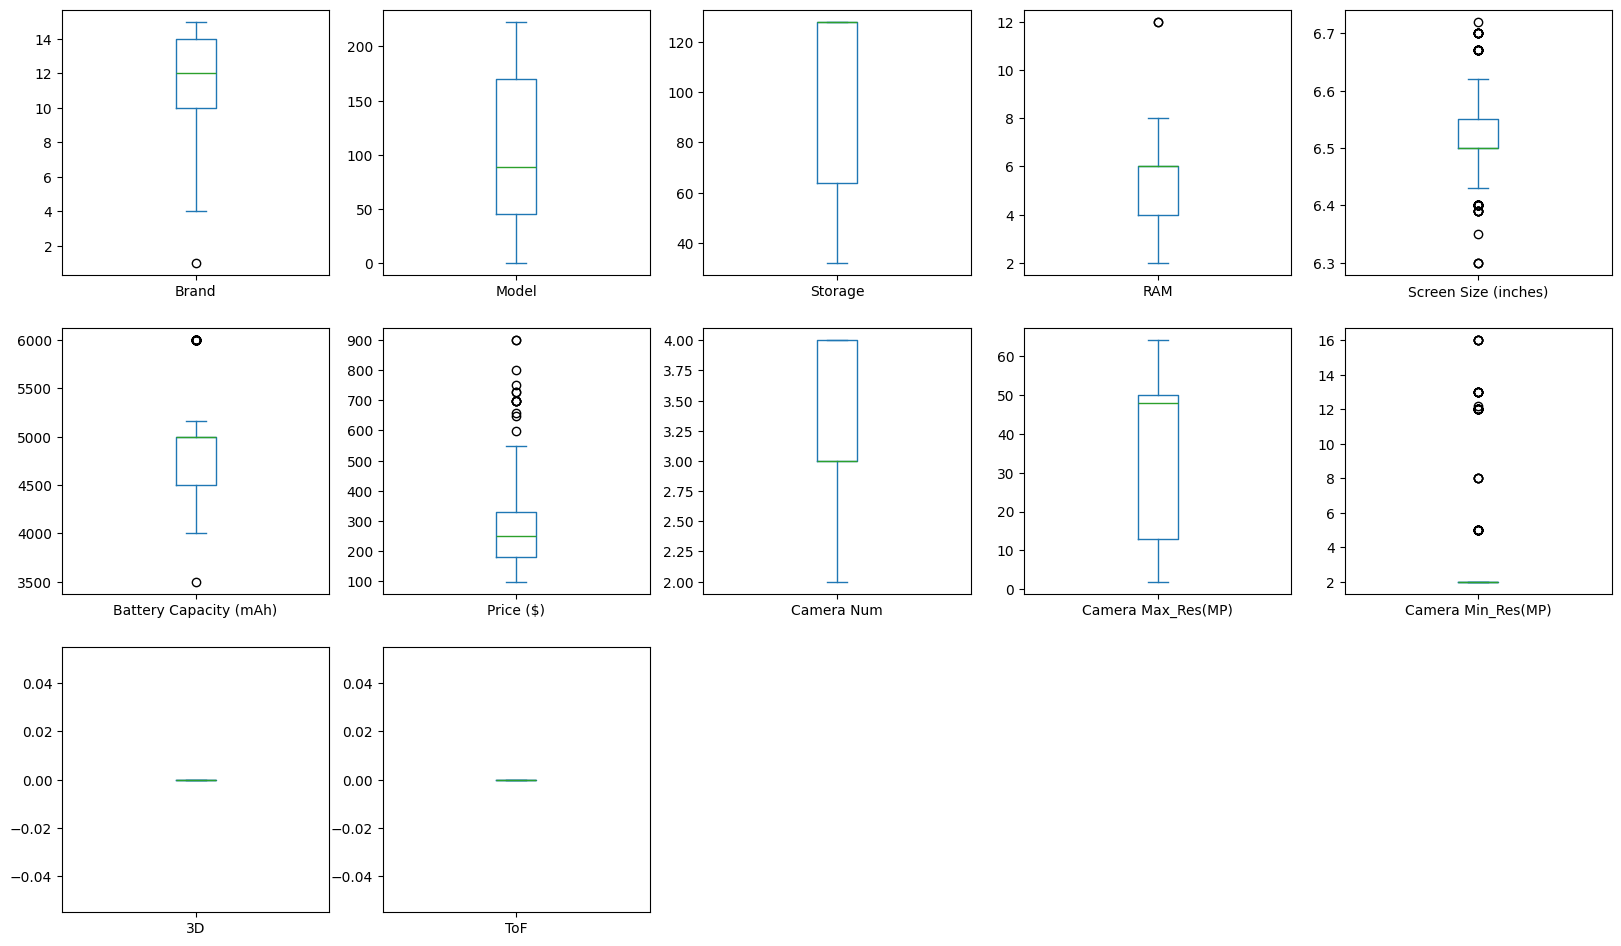

In [47]:
df_filtered.plot(kind = 'box', subplots = True, figsize = (20, 20), layout = (5, 5))

In [48]:
df_filtered = df_filtered.drop(columns=['3D','ToF'])
df.reset_index(drop=True, inplace=True)

Brand                       int32
Model                       int32
Storage                   float64
RAM                       float64
Screen Size (inches)      float64
Battery Capacity (mAh)    float64
Price ($)                 float64
Camera Num                float64
Camera Max_Res(MP)        float64
Camera Min_Res(MP)        float64
dtype: object

### After outliers removal

<Axes: >

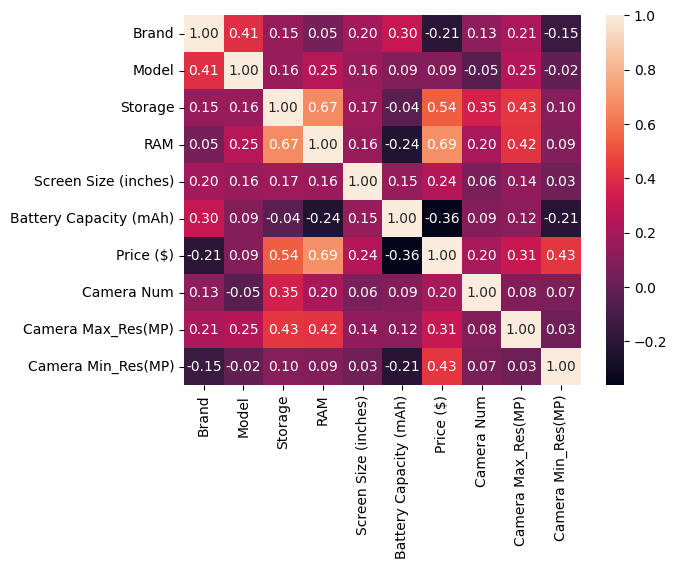

In [103]:
sns.heatmap(df_filtered.corr(), annot = True, fmt = '.2f') 

### Before outliers removal

<Axes: >

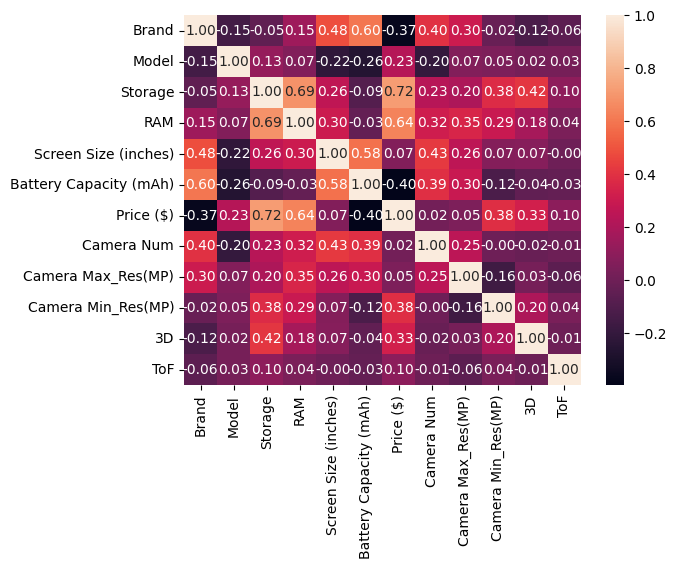

In [51]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f') #before outliers removal

In [86]:
df_filtered = df_filtered.drop_duplicates().reset_index(drop=True)

In [87]:
df_filtered.duplicated().sum()

0

In [88]:
df_filtered.reset_index(drop=True, inplace=True)
df = df_filtered

In [89]:
df['Price ($)']

0      899.0
1      279.0
2      799.0
3      249.0
4      699.0
       ...  
256    149.0
257    319.0
258    329.0
259    349.0
260    429.0
Name: Price ($), Length: 261, dtype: float64

## <center>___La Fin___</center>

## Modeling

In [90]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

In [91]:
x = df.drop(columns='Price ($)')
y = df[['Price ($)']]


57

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [104]:
print(x_train.shape)
print(y_train.shape)

(182, 9)
(182, 1)


In [94]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Prediction and Score

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error

In [96]:
y_pred = model.predict(x_train)

In [102]:
mean_absolute_error(y_pred, y_train), mean_squared_error(y_pred, y_train)

(49.40906110537299, 5461.26357844842)

In [107]:
print(y_pred.shape)

(182, 1)


In [108]:
print(y_test.shape)

(79, 1)


In [110]:
y_train.shape

(182, 1)

In [117]:
y_test.shape 

(79, 1)

261

In [111]:
y_pred.shape

(182, 1)

In [113]:
model.score(x_train, y_train)

0.7284768163248325

In [116]:
accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [261, 182]